<a href="https://colab.research.google.com/github/aiooq/Files/blob/master/lung_cancer_analysis_accuracy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импорты

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

* **GENDER :** M [Male] , F [Female]
* **AGE :** Age of patients
* **SMOKING :** 2 [Yes] , 1 [No]
* **YELLOW_FINGERS :** 2 [Yes] , 1 [No]
* **ANXIETY :** 2 [Yes] , 1 [No]
* **PEER_PRESSURE :** 2 [Yes] , 1 [No]
* **CHRONIC DISEASE :** 2 [Yes] , 1 [No]
* **FATIGUE :** 2 [Yes] , 1 [No]
* **ALLERGY :** 2 [Yes] , 1 [No]
* **WHEEZING :** 2 [Yes] , 1 [No]
* **ALCOHOL CONSUMING :** 2 [Yes] , 1 [No]
* **COUGHING :** 2 [Yes] , 1 [No]
* **SHORTNESS OF BREATH :** 2 [Yes] , 1 [No]
* **SWALLOWING DIFFICULTY :** 2 [Yes] , 1 [No]
* **CHEST PAIN :** 2 [Yes] , 1 [No]
* **LUNG_CANCER :** YES [Positive] , NO [Negative]

In [3]:
data = pd.read_csv("./survey lung cancer.csv")


data.head()

In [8]:
print(f"Dataset Info :\n")
data.info()
data.describe().T

Dataset Info :

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CA

,count,mean,std,min,25%,50%,75%,max
AGE,276.0,62.909420,8.379355,21.0,57.75,62.5,69.0,87.0
SMOKING,276.0,1.543478,0.499011,1.0,1.00,2.0,2.0,2.0
YELLOW_FINGERS,276.0,1.576087,0.495075,1.0,1.00,2.0,2.0,2.0
ANXIETY,276.0,1.496377,0.500895,1.0,1.00,1.0,2.0,2.0
PEER_PRESSURE,276.0,1.507246,0.500856,1.0,1.00,2.0,2.0,2.0
CHRONIC DISEASE,276.0,1.521739,0.500435,1.0,1.00,2.0,2.0,2.0
FATIGUE,276.0,1.663043,0.473529,1.0,1.00,2.0,2.0,2.0
ALLERGY,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
WHEEZING,276.0,1.547101,0.498681,1.0,1.00,2.0,2.0,2.0
ALCOHOL CONSUMING,276.0,1.550725,0.498324,1.0,1.00,2.0,2.0,2.0


In [7]:
dup = data[data.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 33 duplicate entries among 309 entries in this dataset.

After removing duplicate entries there are 276 entries in this dataset.


In [9]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


In [10]:
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


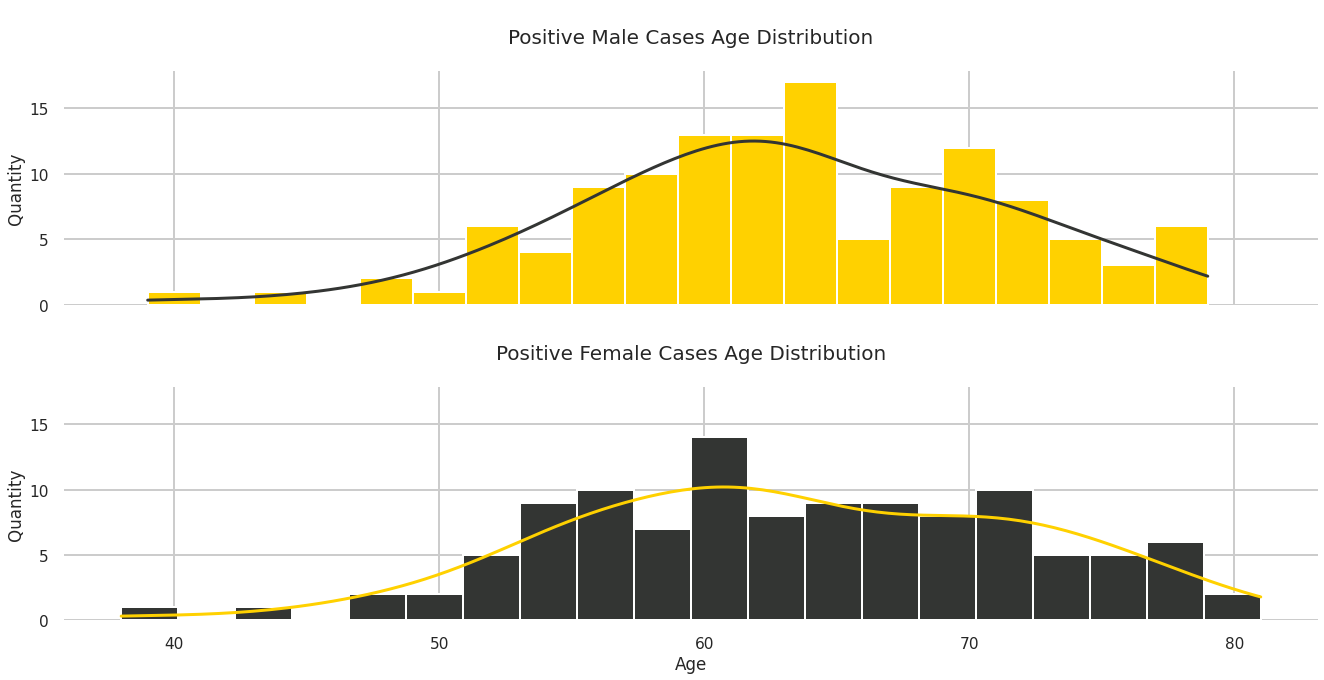

In [11]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)

palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["AGE"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases Age Distribution\n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["AGE"],color=palette[12],kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nPositive Female Cases Age Distribution\n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()

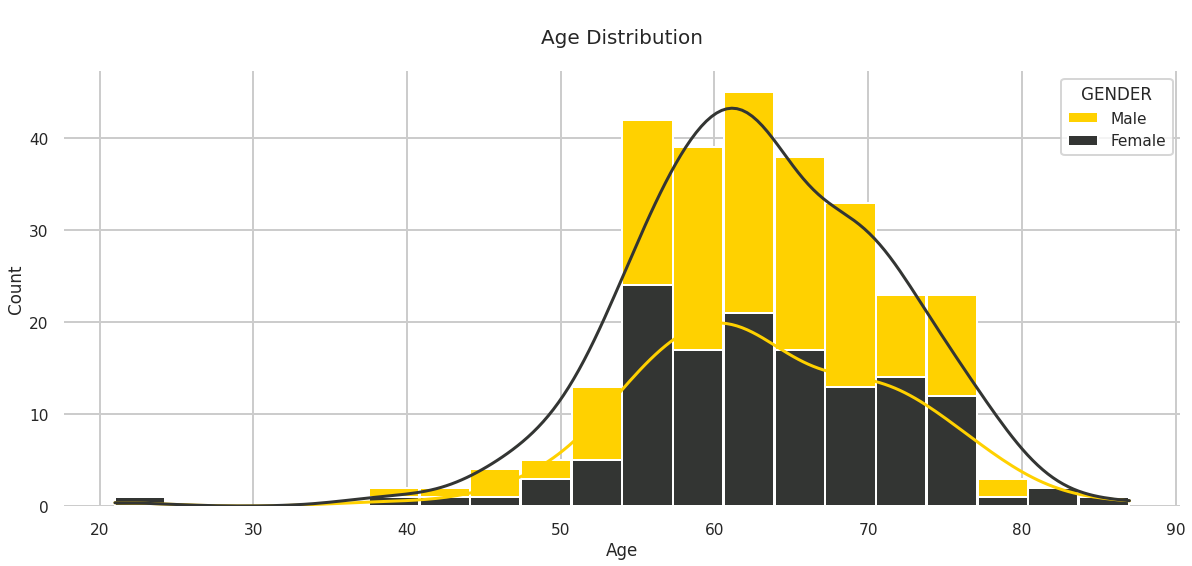

In [12]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data_temp,x="AGE",hue="GENDER",multiple="stack", palette=palette[11:13],kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.axes.lines[0].set_color(palette[11])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\nAge Distribution\n",fontsize=20)
plt.ylabel("Count")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()

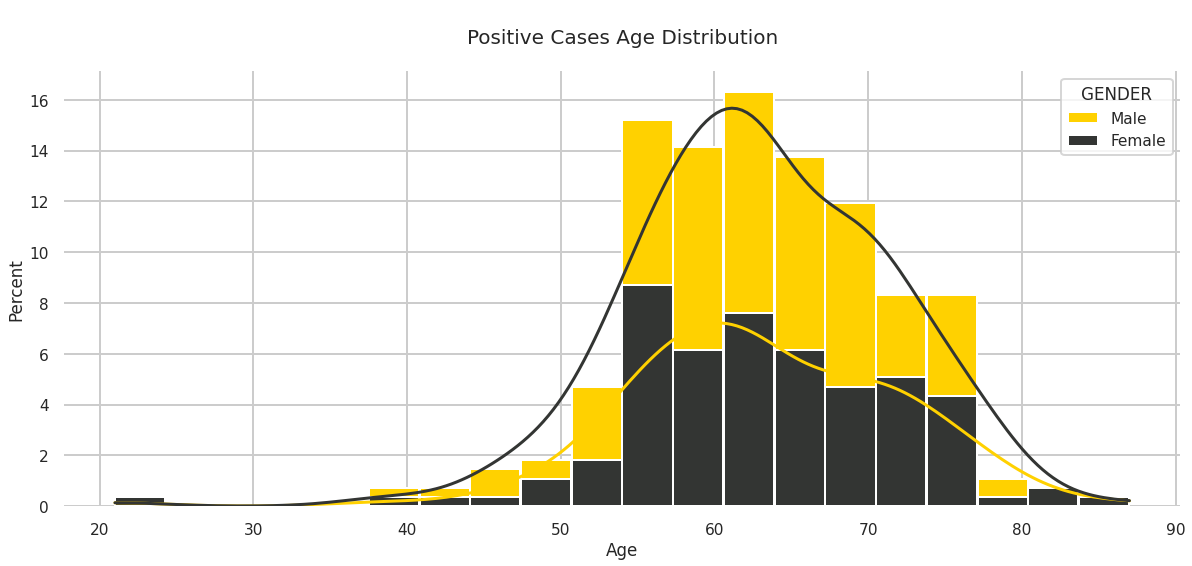

In [19]:
plt.subplots(figsize=(20, 8))
p = sns.histplot(data=data_temp,x="AGE",hue="GENDER",  stat='percent', multiple="stack",palette=palette[11:13],kde=True,shrink=.99,bins=20,alpha=1,fill=True)
p.axes.lines[0].set_color(palette[11])
p.axes.lines[1].set_color(palette[12])
p.axes.set_title("\nPositive Cases Age Distribution\n",fontsize=20)
plt.ylabel("Percent")
plt.xlabel("Age")

sns.despine(left=True, bottom=True)
plt.show()

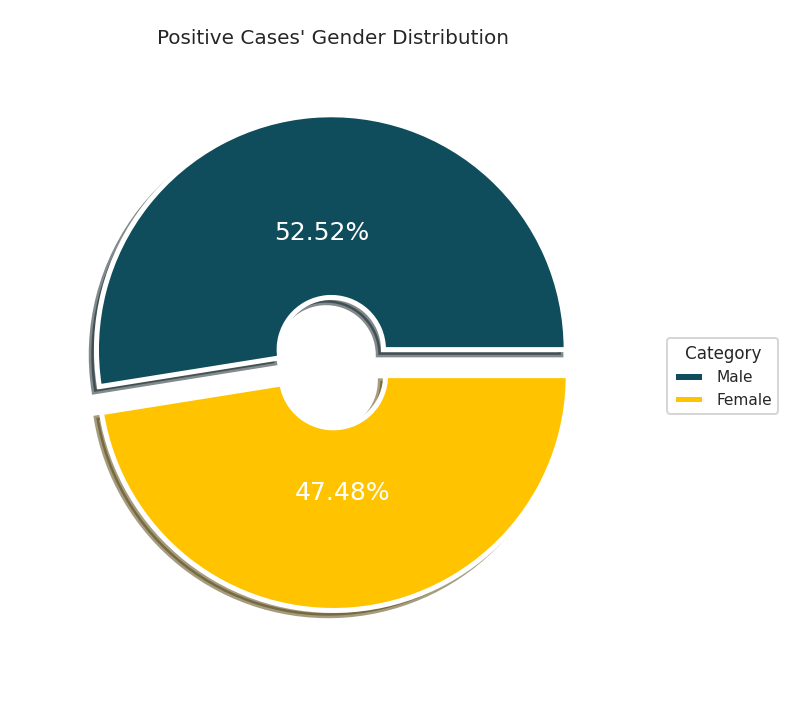

In [20]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.7

wedges, texts, autotexts = plt.pie([len(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["GENDER"]),
                                    len(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0.1,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%", 
                                    pctdistance = 0.5,
                                    radius=.9, 
                                    colors = ["#0f4c5c","#FFC300"], 
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white", 
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution",fontsize=20)
plt.show()

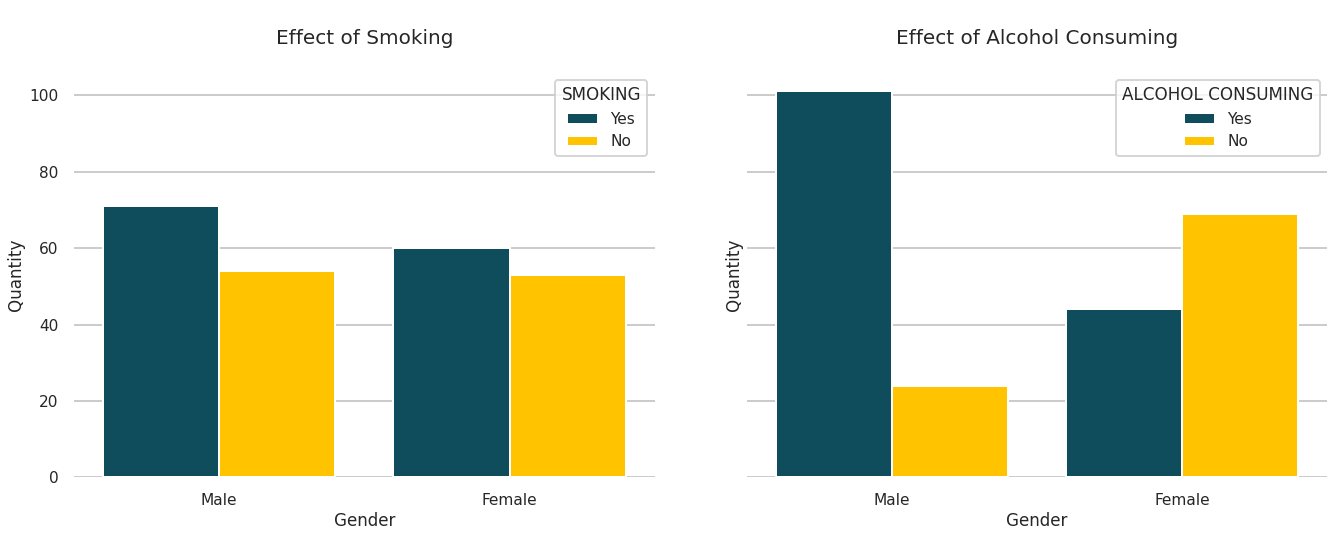

In [23]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SMOKING",hue_order=["Yes","No"],ax=axs[0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0].set_title("\nEffect of Smoking\n",fontsize=20)
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Quantity")
#for container in axs[0].containers:
#    axs[0].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ALCOHOL CONSUMING",hue_order=["Yes","No"],ax=axs[1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1].set_title("\nEffect of Alcohol Consuming\n",fontsize=20)
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Quantity")
#for container in axs[1].containers:
#    axs[1].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

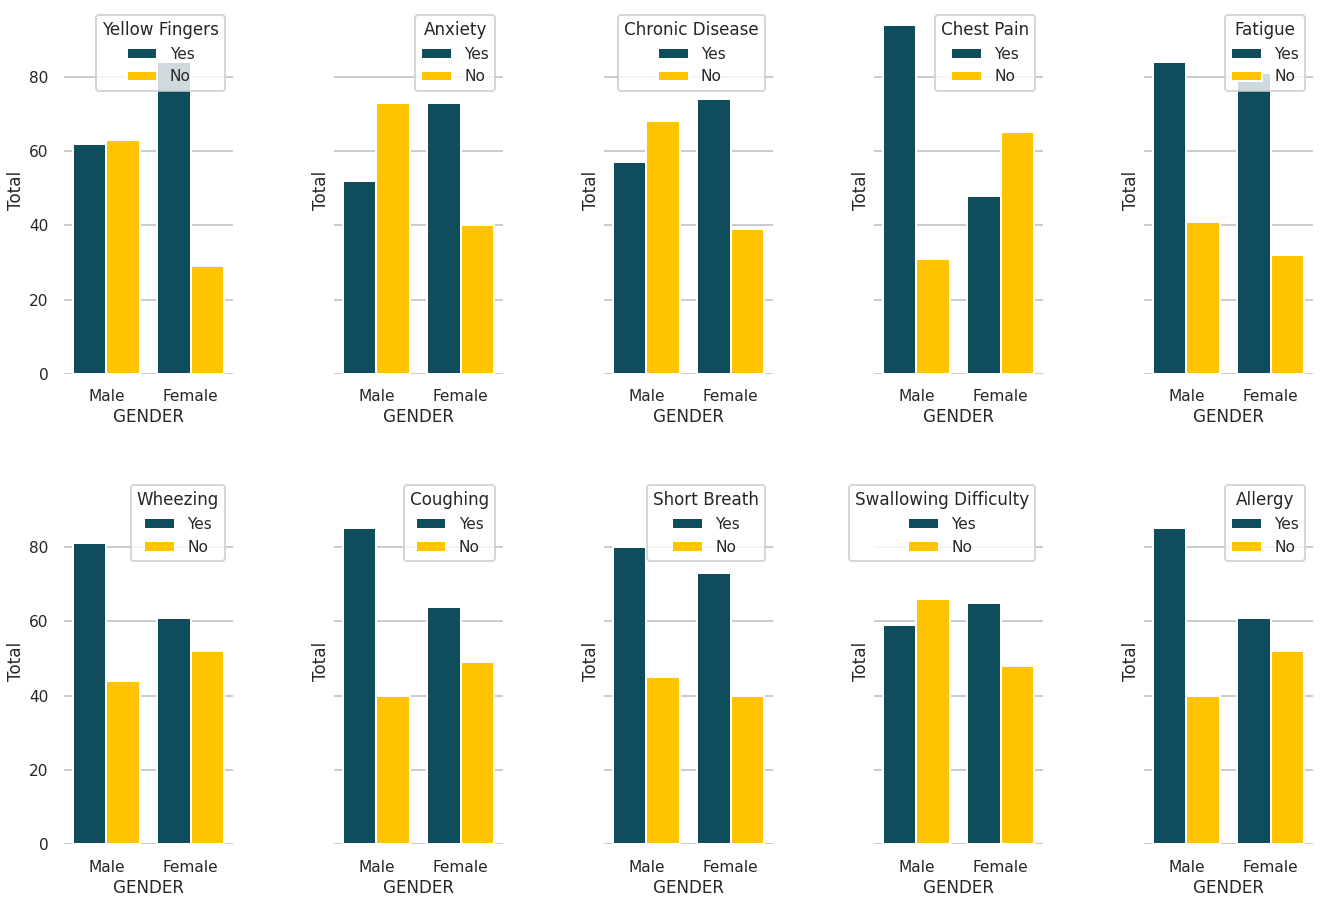

In [24]:
_, axs = plt.subplots(2,5,figsize=(20,14),sharex=False,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="YELLOW_FINGERS",hue_order=["Yes","No"],ax=axs[0,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,0].set_ylabel("Total")
axs[0,0].legend(title="Yellow Fingers",loc="upper right")
#for container in axs[0,0].containers:
#    axs[0,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ANXIETY",hue_order=["Yes","No"],ax=axs[0,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,1].set_ylabel("Total")
axs[0,1].legend(title="Anxiety",loc="upper right")
#for container in axs[0,1].containers:
#    axs[0,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="CHRONIC DISEASE",hue_order=["Yes","No"],ax=axs[0,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,2].set_ylabel("Total")
axs[0,2].legend(title="Chronic Disease",loc="upper right")
#for container in axs[0,2].containers:
#    axs[0,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="CHEST PAIN",hue_order=["Yes","No"],ax=axs[0,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,3].set_ylabel("Total")
axs[0,3].legend(title="Chest Pain",loc="upper right")
#for container in axs[0,3].containers:
#    axs[0,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="FATIGUE ",hue_order=["Yes","No"],ax=axs[0,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,4].set_ylabel("Total")
axs[0,4].legend(title="Fatigue",loc="upper right")
#for container in axs[0,4].containers:
#    axs[0,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="WHEEZING",hue_order=["Yes","No"],ax=axs[1,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,0].set_ylabel("Total")
axs[1,0].legend(title="Wheezing",loc="upper right")
#for container in axs[1,0].containers:
#    axs[1,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="COUGHING",hue_order=["Yes","No"],ax=axs[1,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,1].set_ylabel("Total")
axs[1,1].legend(title="Coughing",loc="upper right")
#for container in axs[1,1].containers:
#    axs[1,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SHORTNESS OF BREATH",hue_order=["Yes","No"],ax=axs[1,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,2].set_ylabel("Total")
axs[1,2].legend(title="Short Breath",loc="upper right")
#for container in axs[1,2].containers:
#    axs[1,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SWALLOWING DIFFICULTY",hue_order=["Yes","No"],ax=axs[1,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,3].set_ylabel("Total")
axs[1,3].legend(title="Swallowing Difficulty",loc="upper right")
#for container in axs[1,3].containers:
#    axs[1,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)    

sns.countplot(data=data_temp_pos,x="GENDER",hue="ALLERGY ",hue_order=["Yes","No"],ax=axs[1,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,4].set_ylabel("Total")
axs[1,4].legend(title="Allergy",loc="upper right")
#for container in axs[1,4].containers:
#    axs[1,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)    

sns.despine(left=True, bottom=True)
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["GENDER"] = data["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])
data.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE"}, inplace=True)

data.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,FEMALE,MALE
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,0,1
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,0,1
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,1,0
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,0,1
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,1,0


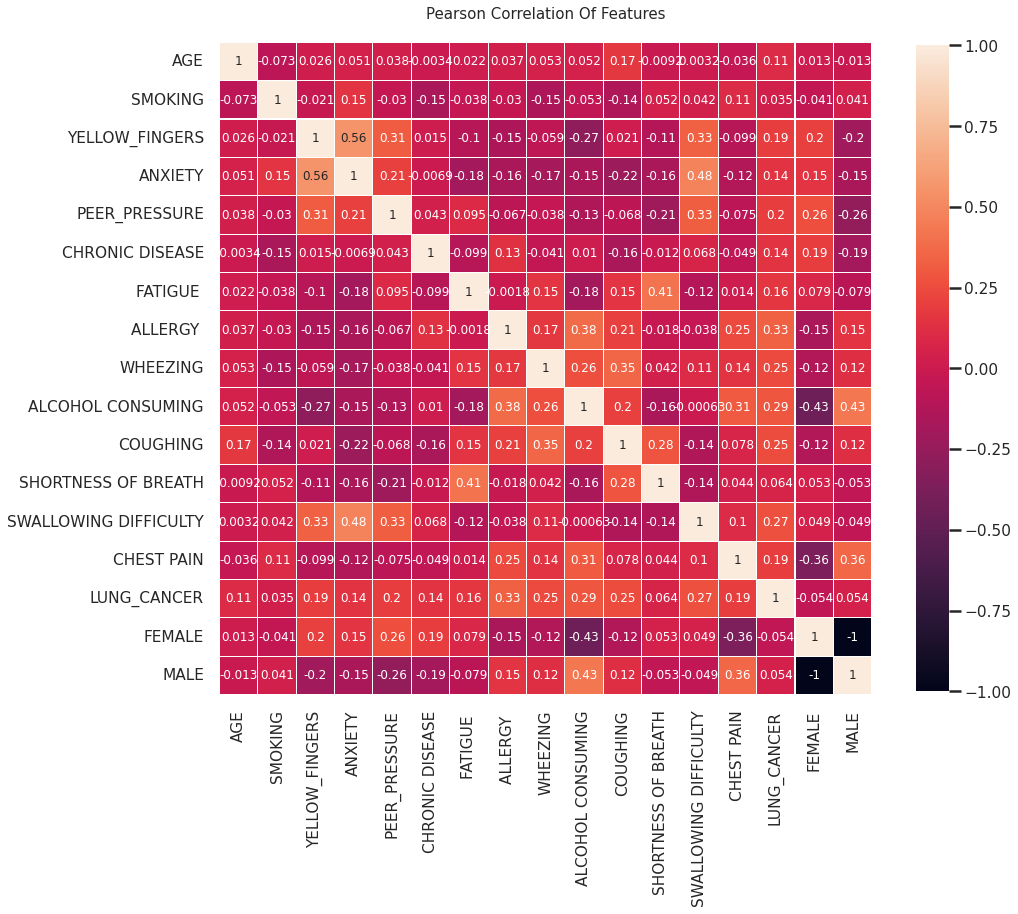

In [26]:
plt.subplots(figsize =(16, 12))

sns.heatmap(data.corr(), square=True, cbar_kws=dict(shrink =.99),
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
plt.title("Pearson Correlation Of Features\n", size=15)
plt.xticks(rotation=90)
plt.show()

In [73]:
x = data.drop("LUNG_CANCER", axis = 1)
y = data["LUNG_CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.22, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (215, 16), (215,)
Shape of testing data : (61, 16), (61,)


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")


Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        49

    accuracy                           0.93        61
   macro avg       0.96      0.83      0.88        61
weighted avg       0.94      0.93      0.93        61


The Accuracy of Logistic Regression is 93.44 %


In [75]:
x = data.drop("LUNG_CANCER", axis = 1)
y = data["LUNG_CANCER"]

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [77]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.22, random_state=42)
print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (215, 16), (215,)
Shape of testing data : (61, 16), (61,)


In [78]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")


Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        49

    accuracy                           0.93        61
   macro avg       0.96      0.83      0.88        61
weighted avg       0.94      0.93      0.93        61


The Accuracy of Logistic Regression is 93.44 %
